# Data Pre-Processing (Linear Regression Test)

This notebook is to run the data pre-processing as described in the progress report.
https://docs.google.com/presentation/d/1PXPFEvt1X1ZZcwDqsMTOGpfHNX_rQHvGJvN-3QbUprI/edit?ts=605064b2#slide=id.p

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('test.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region
1,2001-11,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region
2,2002-07,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region
4,2004-04,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region


## Removing unuseful features

* Town - because it duplicates with Planning Area
* Block - useful geographical location information is already included in latitude and longitude
* Street_name - same as ‘block’
* Eco_category - remove because all are uncategorised 
* Elevation - remove because all the same
* Subzone - highly overlap with Planning Area

In [4]:
df=df.drop(columns=["town","block","street_name","eco_category","elevation","subzone"])
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region
0,2004-01,4 room,04 to 06,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region
1,2001-11,5 room,04 to 06,122.0,improved,1997,1.357618,103.961379,tampines,east region
2,2002-07,3 room,01 to 03,67.0,new generation,1982,1.337804,103.741998,jurong east,west region
3,2015-04,3 room,04 to 06,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region
4,2004-04,5 room,01 to 03,117.0,standard,1978,1.313960,103.769831,clementi,west region


## Clean dirty records

In [5]:
arr_month=df["month"].unique()
np.sort(arr_month)

array(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
       '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
       '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
       '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
       '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
       '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', 

In [6]:
values=df["flat_type"].unique()
print("Before, flat_type:")
print(np.sort(values))

Before, flat_type:
['1 room' '1-room' '2 room' '2-room' '3 room' '3-room' '4 room' '4-room'
 '5 room' '5-room' 'executive' 'multi generation']


In [7]:
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="5-room", "5 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="4-room", "4 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="3-room", "3 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="2-room", "2 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="1-room", "1 room")

df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="5 room", 5)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="4 room", 4)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="3 room", 3)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="2 room", 2)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="1 room", 1)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="executive", 6)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="multi generation", 7)

In [8]:
values=df["flat_type"].unique()
print("After, flat_type:")
print(np.sort(values))

After, flat_type:
[1 2 3 4 5 6 7]


In [9]:
values=df["storey_range"].unique()
print("Before, storey_range:")
print(np.sort(values))

Before, storey_range:
['01 to 03' '01 to 05' '04 to 06' '06 to 10' '07 to 09' '10 to 12'
 '11 to 15' '13 to 15' '16 to 18' '16 to 20' '19 to 21' '21 to 25'
 '22 to 24' '25 to 27' '26 to 30' '28 to 30' '31 to 33' '34 to 36'
 '36 to 40' '37 to 39' '40 to 42' '43 to 45' '46 to 48' '49 to 51']


In [10]:
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="01 to 03", 0)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="01 to 05", 0)

df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="04 to 06", 1)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="06 to 10", 1)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="07 to 09", 1)

df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="10 to 12", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="11 to 15", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="13 to 15", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="16 to 18", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="16 to 20", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="19 to 21", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="21 to 25", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="22 to 24", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="25 to 27", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="26 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="28 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="21 to 25", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="22 to 24", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="25 to 27", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="26 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="28 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="31 to 33", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="31 to 35", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="34 to 36", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="36 to 40", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="37 to 39", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="40 to 42", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="43 to 45", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="46 to 48", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="49 to 51", 2)


values=df["storey_range"].unique()
print("After, storey_range:")
print(np.sort(values))


After, storey_range:
[0 1 2]


In [11]:
df['flat_type'] = df['flat_type'].astype(str).str.strip().astype(int)
df['storey_range'] = df['storey_range'].astype(str).str.strip().astype(int)

In [12]:
values=df["floor_area_sqm"].unique()
print("floor_area_sqm:")
print(np.sort(values))

floor_area_sqm:
[ 31.   34.   35.   38.   39.   40.   41.   42.   43.   44.   45.   46.
  47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.
  59.   60.   60.3  61.   62.   63.   63.1  64.   65.   66.   67.   68.
  69.   70.   71.   72.   73.   74.   75.   76.   77.   78.   79.   80.
  81.   82.   83.   83.1  84.   85.   86.   87.   88.   88.1  89.   89.1
  90.   91.   92.   93.   94.   95.   96.   97.   98.   99.  100.  101.
 102.  103.  104.  105.  106.  107.  108.  109.  110.  111.  112.  113.
 114.  115.  116.  117.  118.  119.  120.  121.  122.  123.  124.  125.
 126.  127.  128.  129.  130.  131.  132.  133.  134.  135.  136.  137.
 138.  139.  140.  141.  142.  143.  144.  145.  146.  147.  148.  149.
 150.  151.  152.  153.  154.  155.  156.  157.  158.  159.  160.  161.
 162.  163.  164.  165.  166.  168.  169.  170.  171.  172.  173.  174.
 175.  176.  177.  179.  180.  181.  182.  183.  184.  186.  187.  188.
 189.  192.  198.  199.  215.  222.  237.  239.

In [13]:
values=df["lease_commence_date"].unique()
print("lease_commence_date:")
print(np.sort(values))

lease_commence_date:
[1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2019]


In [14]:
values=df["planning_area"].unique()
print("planning_area")
print(np.sort(values))

planning_area
['ang mo kio' 'bedok' 'bishan' 'bukit batok' 'bukit merah' 'bukit panjang'
 'bukit timah' 'changi' 'choa chu kang' 'clementi' 'downtown core'
 'geylang' 'hougang' 'jurong east' 'jurong west' 'kallang' 'marine parade'
 'novena' 'outram' 'pasir ris' 'punggol' 'queenstown' 'rochor' 'sembawang'
 'sengkang' 'serangoon' 'sungei kadut' 'tampines' 'tanglin' 'toa payoh'
 'woodlands' 'yishun']


In [15]:
df["planning_area"]=df["planning_area"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107934 entries, 0 to 107933
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   month                107934 non-null  object  
 1   flat_type            107934 non-null  int64   
 2   storey_range         107934 non-null  int64   
 3   floor_area_sqm       107934 non-null  float64 
 4   flat_model           107934 non-null  object  
 5   lease_commence_date  107934 non-null  int64   
 6   latitude             107934 non-null  float64 
 7   longitude            107934 non-null  float64 
 8   planning_area        107934 non-null  category
 9   region               107934 non-null  object  
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 7.5+ MB


## Add new features

Add the following columns based on progress report:

* Remaing lease - 99 minus (transaction year minus lease commencement year)
* Near_school - if it is within 1 km of any primary school
* Distance_MRT - distance to nearest MRT station, in meters.
* Price_per_sqm - unit price/floor area

Additional data from auxiliary
* shopping_malls
* secondary_schools
* markets
* commercial_centers

Then remove the following columns because they are no longer needed:
* lease_commence_date
* latitude
* longitude
* resale_price


In [16]:
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region


In [17]:
df["year"]=df["month"].str[:4].astype(np.int64)
df["remaining_lease"]=99-(df["year"]-df["lease_commence_date"])

nearest_mrt_distance.

In [19]:
%%time
import haversine
from haversine import haversine as hs
from haversine import Unit

def distance(loc1, loc2):
    return hs(loc1,loc2,unit=Unit.METERS)


df_mrt=pd.read_csv("auxiliary-data/sg-train-stations.csv")
df_mrt=df_mrt.dropna()
df_mrt=df_mrt.drop(df_mrt[df_mrt["opening_year"] > 2021].index)

flat_locs=df[["latitude","longitude"]].to_numpy()
flat_locs=list(map(tuple,flat_locs))

mrt_locs=df_mrt[["lat","lng"]].to_numpy()
mrt_locs=list(map(tuple,mrt_locs))

nearest_distances=[]
for flat in flat_locs:
    nearest_distances.append(min([distance(mrt,flat) for mrt in mrt_locs]))

df["nearest_mrt_distance"]=np.asarray(nearest_distances)
df.head()

CPU times: user 31.8 s, sys: 105 ms, total: 31.9 s
Wall time: 31.9 s


,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,year,remaining_lease,nearest_mrt_distance
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region,2004,84,667.550041
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region,2001,95,766.385760
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region,2002,79,518.257497
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region,2015,65,546.923279
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region,2004,73,515.878471


exist_primary_school

In [20]:
%%time
df_ps=pd.read_csv("auxiliary-data/sg-primary-schools.csv")
df_ps=df_ps.dropna()

ps_locs=df_ps[["lat","lng"]].to_numpy()
ps_locs=list(map(tuple,ps_locs))

exist_primary_school=[]
for flat in flat_locs:
    exist_primary_school.append(min([distance(mrt,flat) for mrt in mrt_locs])<=1000)

df["exist_primary_school"]=np.asarray(exist_primary_school)
df.head()

CPU times: user 32.1 s, sys: 115 ms, total: 32.2 s
Wall time: 32.3 s


,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,year,remaining_lease,nearest_mrt_distance,exist_primary_school
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region,2004,84,667.550041,True
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region,2001,95,766.385760,True
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region,2002,79,518.257497,True
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region,2015,65,546.923279,True
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region,2004,73,515.878471,True


shopping_malls

In [21]:
%%time
df_sm=pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
df_sm=df_sm.dropna()

sm_locs=df_sm[["lat","lng"]].to_numpy()
sm_locs=list(map(tuple,sm_locs))

nearest_shopping_mall=[]
for flat in flat_locs:
    nearest_shopping_mall.append(min([distance(sm,flat) for sm in sm_locs]))

df["nearest_shopping_mall_distance"]=np.asarray(nearest_shopping_mall)
df.head()

CPU times: user 24.9 s, sys: 47.3 ms, total: 24.9 s
Wall time: 25 s


,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,year,remaining_lease,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region,2004,84,667.550041,True,693.942863
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region,2001,95,766.385760,True,1933.981858
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region,2002,79,518.257497,True,524.612777
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region,2015,65,546.923279,True,829.129343
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region,2004,73,515.878471,True,604.665329


secondary_schools

In [22]:
df_ss=pd.read_csv("auxiliary-data/sg-secondary-schools.csv")
df_ss=df_ss.dropna()

ss_locs=df_ss[["lat","lng"]].to_numpy()
ss_locs=list(map(tuple,ss_locs))

nearest_secondary_school=[]
for flat in flat_locs:
    nearest_secondary_school.append(min([distance(ss,flat) for ss in ss_locs]))
    
df["nearest_secondary_school_distance"]=np.asarray(nearest_secondary_school)
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,year,remaining_lease,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region,2004,84,667.550041,True,693.942863,426.327096
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region,2001,95,766.385760,True,1933.981858,78.892031
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region,2002,79,518.257497,True,524.612777,401.047112
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region,2015,65,546.923279,True,829.129343,571.233597
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region,2004,73,515.878471,True,604.665329,443.189643


markets

In [23]:
df_mk=pd.read_csv("auxiliary-data/sg-gov-markets-hawker-centres.csv")
df_mk=df_mk.dropna()

mk_locs=df_mk[["lat","lng"]].to_numpy()
mk_locs=list(map(tuple,mk_locs))

nearest_market=[]
for flat in flat_locs:
    nearest_market.append(min([distance(mk,flat) for mk in mk_locs]))
    
df["nearest_market_distance"]=np.asarray(nearest_market)
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,year,remaining_lease,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance,nearest_market_distance
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region,2004,84,667.550041,True,693.942863,426.327096,792.807501
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region,2001,95,766.385760,True,1933.981858,78.892031,2070.576778
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region,2002,79,518.257497,True,524.612777,401.047112,788.368437
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region,2015,65,546.923279,True,829.129343,571.233597,957.602360
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region,2004,73,515.878471,True,604.665329,443.189643,112.999032


commercial_centers

In [24]:
df_com=pd.read_csv("auxiliary-data/sg-commerical-centres.csv")
df_com=df_com.dropna()

com_locs=df_com[["lat","lng"]].to_numpy()
com_locs=list(map(tuple,com_locs))

nearest_commercial_center=[]
for flat in flat_locs:
    nearest_commercial_center.append(min([distance(com,flat) for com in com_locs]))
    
df["nearest_commercial_distance"]=np.asarray(nearest_commercial_center)
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,year,remaining_lease,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance,nearest_market_distance,nearest_commercial_distance
0,2004-01,4,1,94.0,new generation,1989,1.346581,103.744085,bukit batok,west region,2004,84,667.550041,True,693.942863,426.327096,792.807501,1750.117799
1,2001-11,5,1,122.0,improved,1997,1.357618,103.961379,tampines,east region,2001,95,766.385760,True,1933.981858,78.892031,2070.576778,1819.775858
2,2002-07,3,0,67.0,new generation,1982,1.337804,103.741998,jurong east,west region,2002,79,518.257497,True,524.612777,401.047112,788.368437,929.135725
3,2015-04,3,1,82.0,new generation,1981,1.380084,103.849574,ang mo kio,north-east region,2015,65,546.923279,True,829.129343,571.233597,957.602360,2027.314184
4,2004-04,5,0,117.0,standard,1978,1.313960,103.769831,clementi,west region,2004,73,515.878471,True,604.665329,443.189643,112.999032,1827.566748


In [26]:
df=df.drop(columns=["lease_commence_date","latitude","longitude"])
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,planning_area,region,year,remaining_lease,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance,nearest_market_distance,nearest_commercial_distance
0,2004-01,4,1,94.0,new generation,bukit batok,west region,2004,84,667.550041,True,693.942863,426.327096,792.807501,1750.117799
1,2001-11,5,1,122.0,improved,tampines,east region,2001,95,766.385760,True,1933.981858,78.892031,2070.576778,1819.775858
2,2002-07,3,0,67.0,new generation,jurong east,west region,2002,79,518.257497,True,524.612777,401.047112,788.368437,929.135725
3,2015-04,3,1,82.0,new generation,ang mo kio,north-east region,2015,65,546.923279,True,829.129343,571.233597,957.602360,2027.314184
4,2004-04,5,0,117.0,standard,clementi,west region,2004,73,515.878471,True,604.665329,443.189643,112.999032,1827.566748


## Feature Engineering

### check for multicollinearity

In [27]:
import seaborn as sns

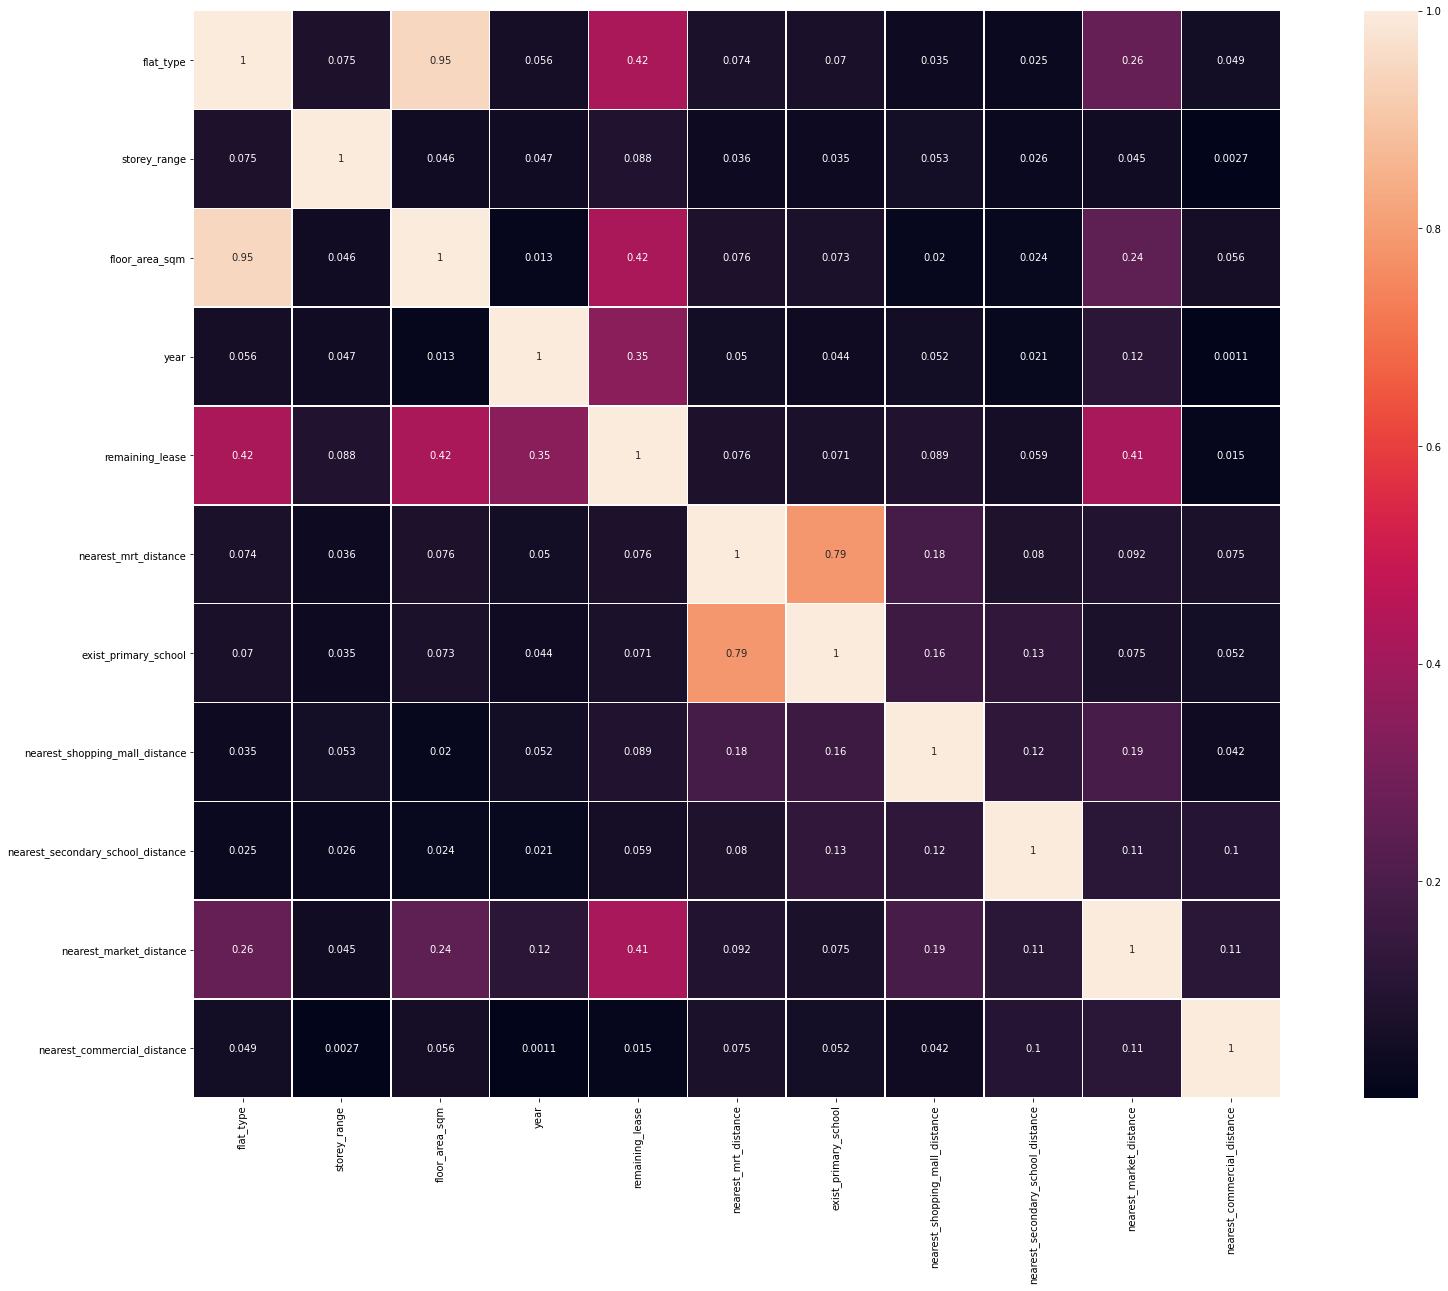

In [28]:
plt.subplots(figsize=(30, 20))
sns.heatmap(df.corr('pearson').abs(), annot = True, square = True, linewidths = 0.5)
plt.show()

In [29]:
# Determine strong pairs:
cor_pairs = df.corr().unstack()
strong_pairs = cor_pairs[((cor_pairs) > 0.5) & ((cor_pairs) < 1.0)]
strong_pairs

flat_type       floor_area_sqm    0.949263
floor_area_sqm  flat_type         0.949263
dtype: float64

In [30]:
# Drop one of the highly correlated variables.

df = df.drop(['floor_area_sqm'], axis=1)

### check for normality

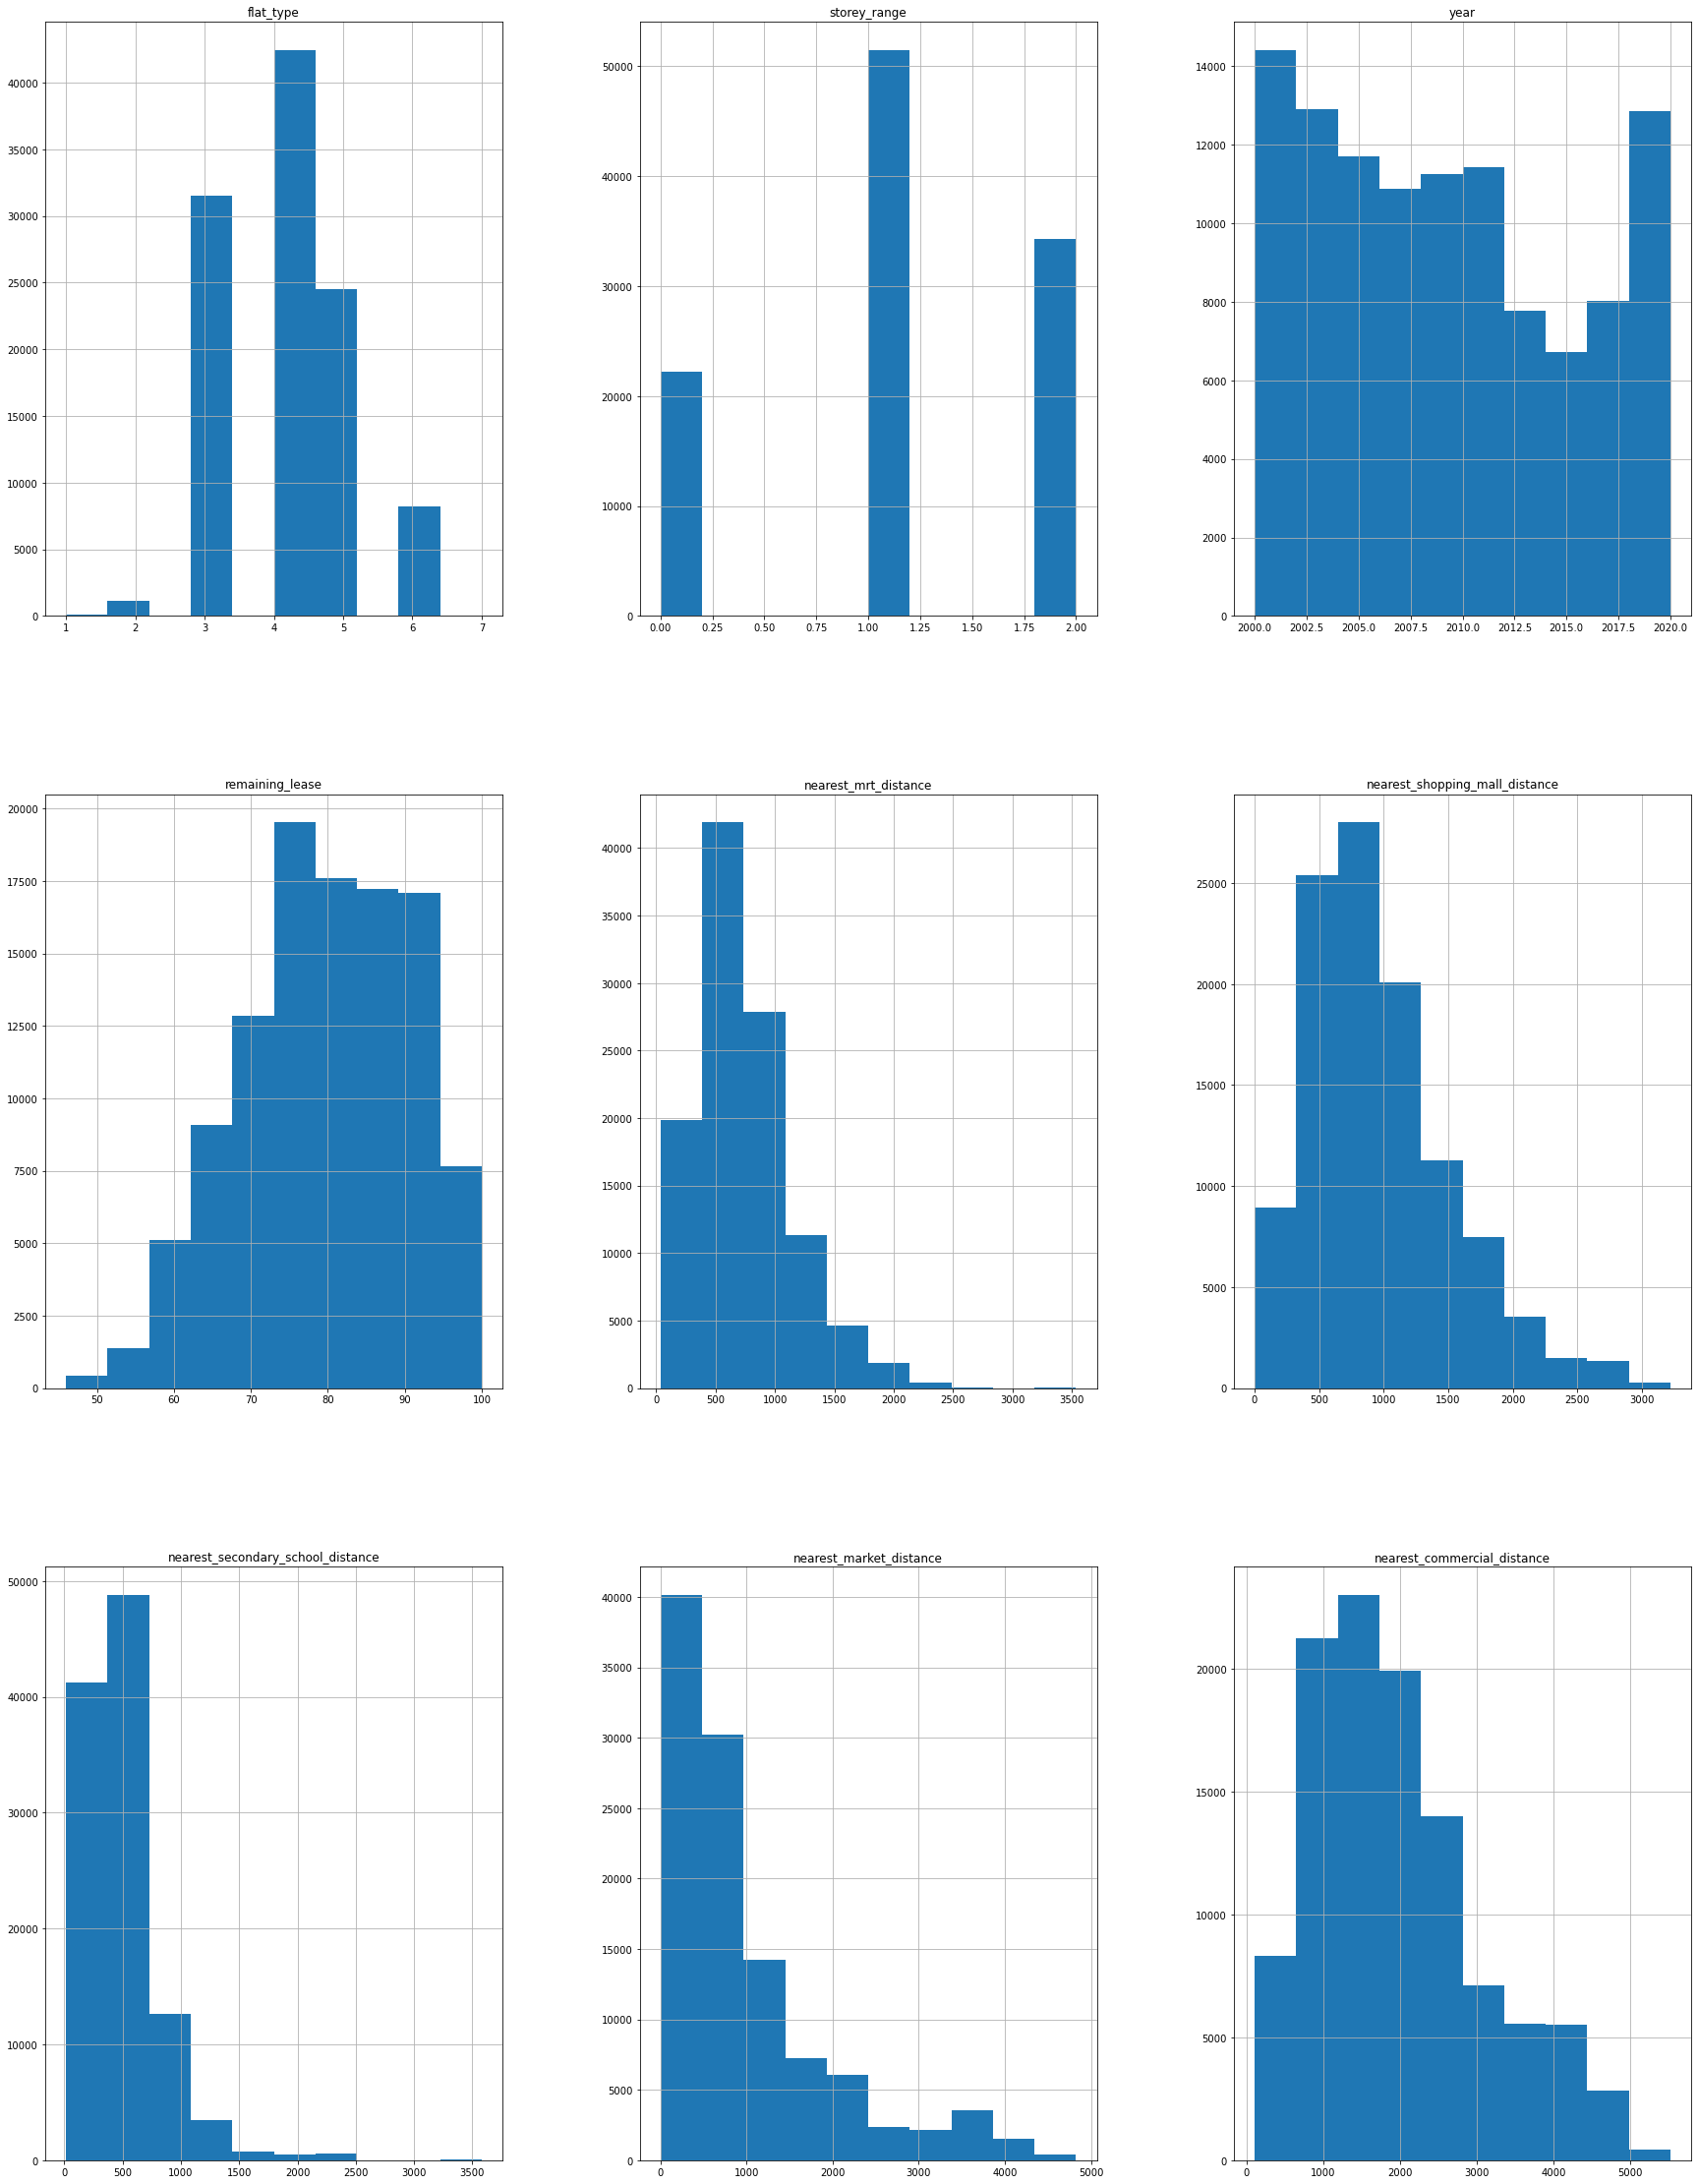

In [32]:
df_eda = df.hist(column = df.columns, figsize = (30,40))

In [33]:
# From the above plots, we conclude that logging is effective at smoothing skewness for SalePrice, LotArea, BsmtUnfSF
# & GrLivArea.

df['flat_type'] = np.log1p(df['flat_type'])
df['storey_range'] = np.log1p(df['storey_range'])
df['nearest_mrt_distance'] = np.log1p(df['nearest_mrt_distance'])
df['nearest_secondary_school_distance'] = np.log1p(df['nearest_secondary_school_distance'])
df['nearest_market_distance'] = np.log1p(df['nearest_market_distance'])
df['nearest_commercial_distance'] = np.log1p(df['nearest_commercial_distance'])

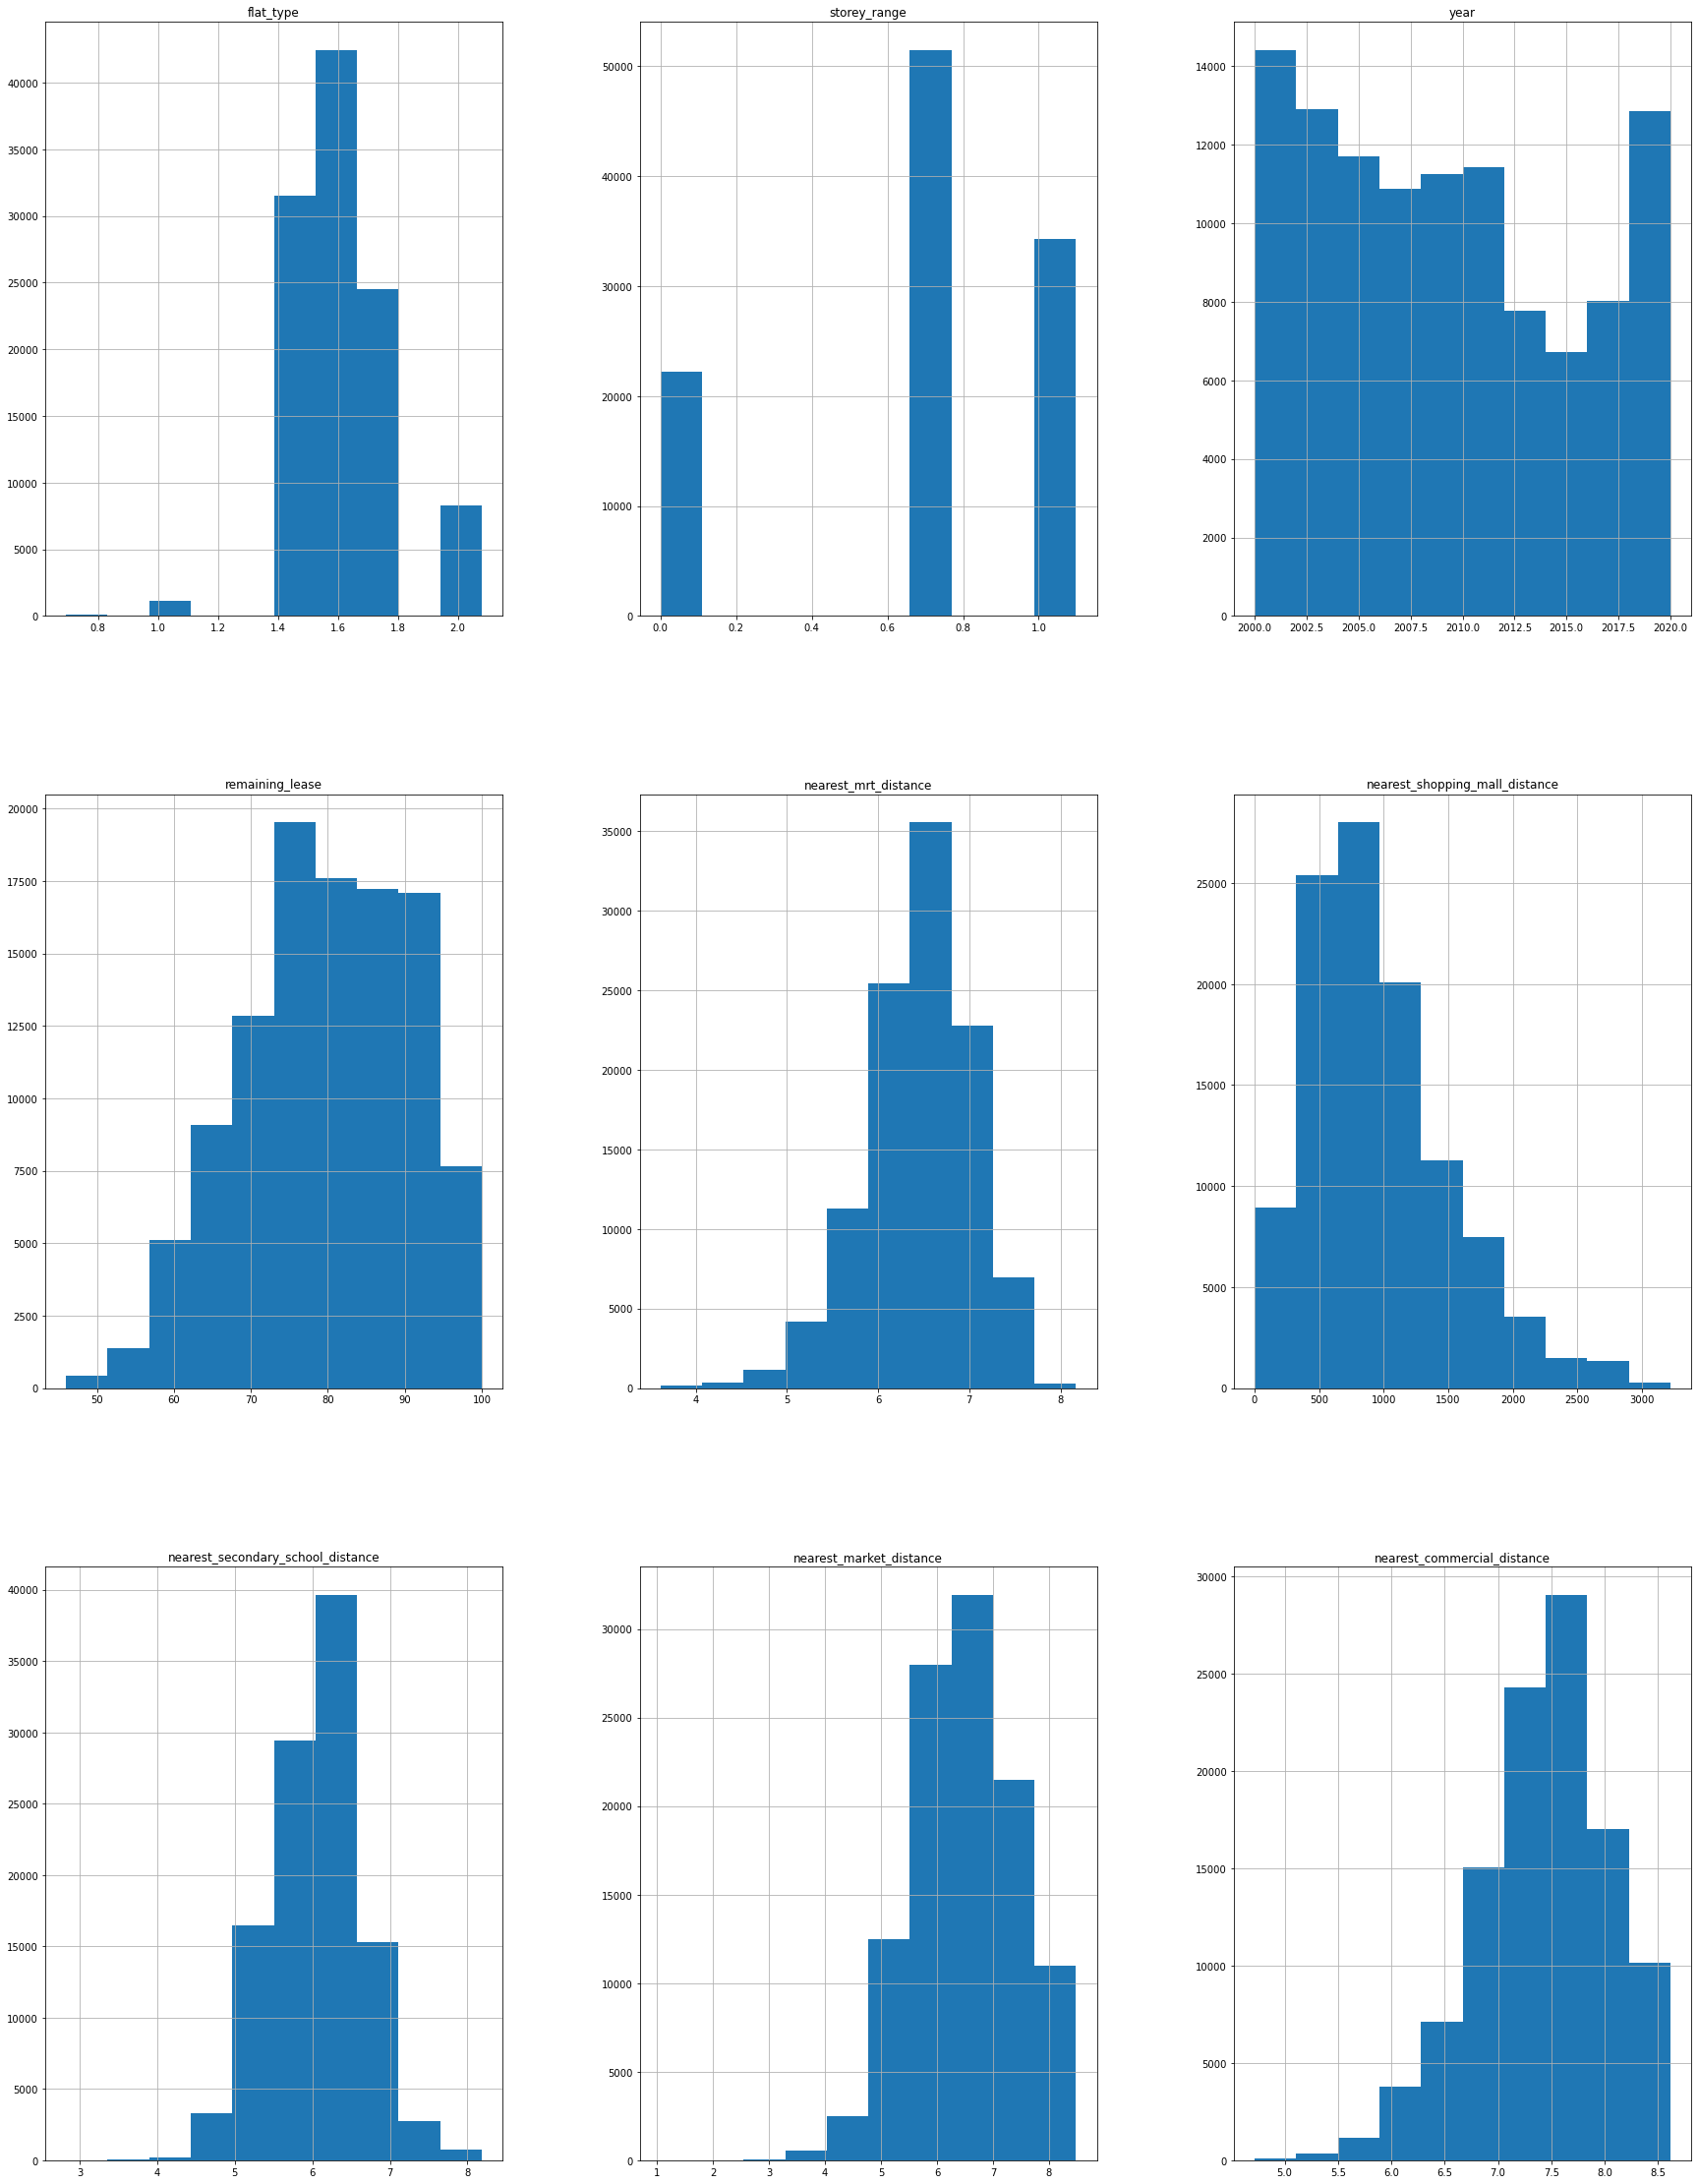

In [34]:
df_eda = df.hist(column = df.columns, figsize = (30,40))

### Encoding categorical variables

In [35]:
# exist_primary_school
df["exist_primary_school"]=df["exist_primary_school"].mask(df["exist_primary_school"]==False, 0)
df["exist_primary_school"]=df["exist_primary_school"].mask(df["exist_primary_school"]==True, 1)

In [36]:
df['exist_primary_school'] = df['exist_primary_school'].astype(str).str.strip().astype(int)

In [37]:
# one hot encoding planning_area
onehot = pd.get_dummies(df['planning_area'])
onehot.head()

,ang mo kio,bedok,bishan,bukit batok,bukit merah,bukit panjang,bukit timah,changi,choa chu kang,clementi,...,rochor,sembawang,sengkang,serangoon,sungei kadut,tampines,tanglin,toa payoh,woodlands,yishun
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df = pd.concat([df, onehot], axis=1)

In [39]:
df=df.drop(columns=['planning_area', 'flat_model', 'region', 'month'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107934 entries, 0 to 107933
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   flat_type                          107934 non-null  float64
 1   storey_range                       107934 non-null  float64
 2   year                               107934 non-null  int64  
 3   remaining_lease                    107934 non-null  int64  
 4   nearest_mrt_distance               107934 non-null  float64
 5   exist_primary_school               107934 non-null  int64  
 6   nearest_shopping_mall_distance     107934 non-null  float64
 7   nearest_secondary_school_distance  107934 non-null  float64
 8   nearest_market_distance            107934 non-null  float64
 9   nearest_commercial_distance        107934 non-null  float64
 10  ang mo kio                         107934 non-null  uint8  
 11  bedok                              1079

## Writing the process data into a new file



In [41]:
%%time
filename="processed_test2.csv"

df.to_csv(filename, index=False)
    

CPU times: user 1.53 s, sys: 48.1 ms, total: 1.58 s
Wall time: 1.59 s
